# Introduction
## Goal 🎯
The Objective is to follow the universal workflow of DLWP 4.5 for any dataset and restricting models to 
sequential Dense and Dropout layers.
<br>The Universal workflow to follow is:
-  Defining the problem and assembling a dataset
-  Choosing a measure of success
-  Deciding on an evaluation protocol
-  Preparing your data
-  Developing a model that does better than a baseline
-  Scaling up: developing a model that overfits
-  Regularizing your model and tuning your hyperparameters



## About Dataset

Dataset (UCI Machine Learning repository) - <a href = "https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+%28Sonar%2C+Mines+vs.+Rocks%29">Connectionist Bench (Sonar, Mines vs. Rocks) Data Set.</a> 

##### Problem : 
The task is to train a network to discriminate between sonar signals bounced off a metal cylinder and those bounced off a roughly cylindrical rock.

It is a good test dataset for neural networks because all of the input values are numerical and have the same scale.

We will evaluate the developed models using scikit-learn with 10-fold cross validation, in order to better tease out differences in the results.

The data set contains signals obtained from a variety of different aspect angles, spanning 90 degrees for the cylinder and 180 degrees for the rock.

Each pattern is a set of 60 numbers in the range 0.0 to 1.0. Each number represents the energy within a particular frequency band, integrated over a certain period of time. The integration aperture for higher frequencies occur later in time, since these frequencies are transmitted later during the chirp.

The label associated with each record contains the letter "R" if the object is a rock and "M" if it is a mine (metal cylinder). The numbers in the labels are in increasing order of aspect angle, but they do not encode the angle directly.

## Explore the data

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("sonar.all-data.csv", header=None)
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
106,0.0331,0.0423,0.0474,0.0818,0.0835,0.0756,0.0374,0.0961,0.0548,0.0193,...,0.0078,0.0174,0.0176,0.0038,0.0129,0.0066,0.0044,0.0134,0.0092,M
77,0.0336,0.0294,0.0476,0.0539,0.0794,0.0804,0.1136,0.1228,0.1235,0.0842,...,0.0150,0.0111,0.0032,0.0035,0.0169,0.0137,0.0015,0.0069,0.0051,R
89,0.0235,0.0291,0.0749,0.0519,0.0227,0.0834,0.0677,0.2002,0.2876,0.3674,...,0.0083,0.0037,0.0095,0.0105,0.0030,0.0132,0.0068,0.0108,0.0090,R
125,0.0228,0.0853,0.1000,0.0428,0.1117,0.1651,0.1597,0.2116,0.3295,0.3517,...,0.0172,0.0191,0.0260,0.0140,0.0125,0.0116,0.0093,0.0012,0.0036,M
191,0.0315,0.0252,0.0167,0.0479,0.0902,0.1057,0.1024,0.1209,0.1241,0.1533,...,0.0108,0.0062,0.0044,0.0072,0.0007,0.0054,0.0035,0.0001,0.0055,M


In [3]:
df.shape

(208, 61)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,208.0,0.029164,0.022991,0.0015,0.013350,0.02280,0.035550,0.1371
1,208.0,0.038437,0.032960,0.0006,0.016450,0.03080,0.047950,0.2339
2,208.0,0.043832,0.038428,0.0015,0.018950,0.03430,0.057950,0.3059
3,208.0,0.053892,0.046528,0.0058,0.024375,0.04405,0.064500,0.4264
4,208.0,0.075202,0.055552,0.0067,0.038050,0.06250,0.100275,0.4010
5,208.0,0.104570,0.059105,0.0102,0.067025,0.09215,0.134125,0.3823
6,208.0,0.121747,0.061788,0.0033,0.080900,0.10695,0.154000,0.3729
7,208.0,0.134799,0.085152,0.0055,0.080425,0.11210,0.169600,0.4590
8,208.0,0.178003,0.118387,0.0075,0.097025,0.15225,0.233425,0.6828
9,208.0,0.208259,0.134416,0.0113,0.111275,0.18240,0.268700,0.7106


### Handling missing values

In [5]:
set(df.isna().any())

{False}

#### Data is clean. No missing value treatment required.

In [6]:
df[60].value_counts() # label is not skewed

M    111
R     97
Name: 60, dtype: int64

# Methodology
## Choosing a measure of success

It is a binary classification problem that requires a model to differentiate rocks from metal cylinders.
From the above result we can conclude that data is balanced for both the target classes.
In this case measure of success will be :
- Accuracy
- ROC AUC


## Deciding on an evaluation protocol
K-fold cross-validation will be used as an evaluation protocol as our dataset is small. 

## Data Preprocessing

In [7]:
# As last column is target variable
X = df.drop(60, axis=1)
y = df[60]
y.head()

0    R
1    R
2    R
3    R
4    R
Name: 60, dtype: object

In [8]:
# Converting y to numerical values
y = pd.get_dummies(y, drop_first=True)
y.sample(5) # R --> 1 and M --> 0

,R
117,0
34,1
184,0
78,1
113,0


In [9]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


### Splitting Data as train and test data

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,stratify=y, random_state=1)

In [11]:
X_train.shape , X_test.shape

((156, 60), (52, 60))

In [12]:
y_train.value_counts() , y_test.value_counts()

(R
 0    83
 1    73
 dtype: int64,
 R
 0    28
 1    24
 dtype: int64)

# Setting up the Baseline Model 

In [13]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix , classification_report
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

### Defining the Baseline model architecture
The baseline network will be simple. in that it has one hidden layers with 30 nodes and relu is a popular choice for activation function, which is short for rectified linear unit

- vetor with 60 values for the input layer.
- Used a fully-connected linear layer with 30 hidden-neurons.
- Used the ReLU activation function for hidden layers.
- Used a fully-connected linear layer to the 1 outputs with sigmoid activation function.
- Optimization algorithm used - ADAM
- Metrics Used - Accuracy
- Loss Function - binary_crossentropy

In [14]:
# baseline
def baseline_model():
    #Baseline model
    model = keras.Sequential([
        keras.layers.Dense(30, input_dim=60, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy',
                  optimizer='adam', 
                  metrics=['accuracy'])
    return model

In [15]:
# define plot function for the fit
# we will plot the accuracy here
def plot_history(history): 
    plt.figure(figsize=(15,8))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()
    return history.history['accuracy'][-1] , history.history['val_accuracy'][-1]

In [16]:

def model_report(model, X_test, y_test):
    y_pred = model.predict(X_test).reshape(-1)
    # round the values to nearest integer ie 0 or 1
    y_pred = np.round(y_pred)
    print(classification_report(y_test, y_pred))
    acc = accuracy_score(y_test,y_pred)
    auc = roc_auc_score(y_test,y_pred)
    print(f"Test data roc_auc_score = {auc:.3f}")
    return acc, auc

In [17]:
baseline_model1 = baseline_model()

baseline_model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                1830      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 1,861
Trainable params: 1,861
Non-trainable params: 0
_________________________________________________________________


In [18]:
epochs = 100
batch_size = 16

history_baseline_model1 = baseline_model1.fit(X_train, 
                              y_train,
                              epochs=epochs,
                              batch_size=batch_size,
                              verbose=0, # set to 1 for iteration details, 0 for no details
                              shuffle=True,
                              validation_split= 0.2)

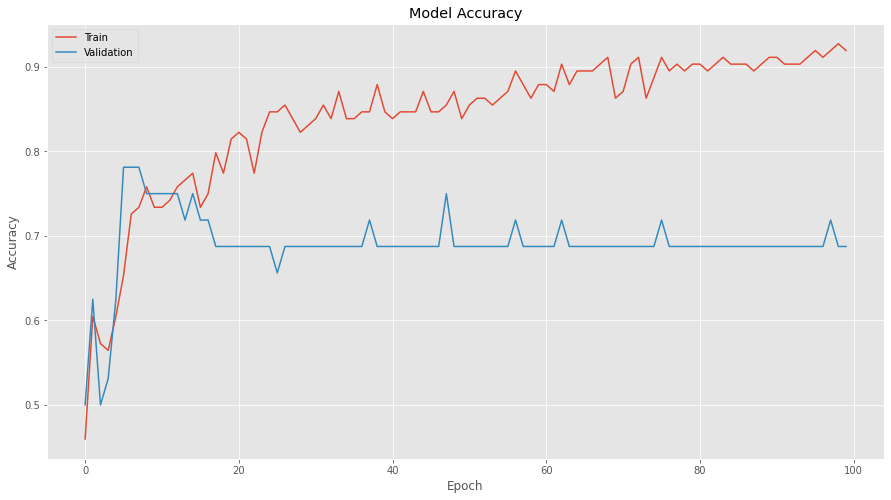

In [19]:
train_acc_baseline_model1,val_acc_baseline_model1 = plot_history(history_baseline_model1)

In [20]:
baseline_model1.evaluate(X_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.5062 - accuracy: 0.7500


[0.5062463283538818, 0.75]

In [21]:
acc_baseline_model1, auc_baseline_model1 = model_report(baseline_model1, X_test, y_test)

              precision    recall  f1-score   support

           0       0.80      0.71      0.75        28
           1       0.70      0.79      0.75        24

    accuracy                           0.75        52
   macro avg       0.75      0.75      0.75        52
weighted avg       0.76      0.75      0.75        52

Test data roc_auc_score = 0.753


## Results

In [22]:
print(f"This model achieved a training accuracy of over {round(train_acc_baseline_model1*100,2)}%, but a validation accuracy of only about {round(val_acc_baseline_model1*100,2)}%.\nIn the graphic above it can be observed that: \nAs the Train Accuracy increases, the validation Accuracy is not increasing.\nThe accuracy on test data is {round(acc_baseline_model1*100,2)}% \nAnd ROC AUC Score is {round(auc_baseline_model1*100,2)}% \nThis baseline model can be improved by adding more dense layers. ")

This model achieved a training accuracy of over 91.94%, but a validation accuracy of only about 68.75%.
In the graphic above it can be observed that: 
As the Train Accuracy increases, the validation Accuracy is not increasing.
The accuracy on test data is 75.0% 
And ROC AUC Score is 75.3% 
This baseline model can be improved by adding more dense layers. 


# Developing a model that does better than a baseline

### Defining the Better model architecture
This network will be slightly more complicated. in that it has two hidden layers with  30 and 15 nodes respectively and relu is a popular choice for activation function, which is short for rectified linear unit

- vetor with 60 values for the input layer.
- Used a fully-connected linear layer with 30 hidden-neurons.
- Used a fully-connected linear layer with 15 hidden-neurons.
- Used the ReLU activation function for hidden layers.
- Used a fully-connected linear layer to the 1 outputs with sigmoid activation function.
- Optimization algorithm used - ADAM
- Metrics Used - Accuracy
- Loss Function - binary_crossentropy

In [23]:
# better
def better_model():
    #Better model
    model = keras.Sequential([
        keras.layers.Dense(30, input_dim=60, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy',
                  optimizer='adam', 
                  metrics=['accuracy'])
    return model

In [24]:
better_model1 = better_model()

# in the summary, notice the LARGE number of total parameters in the model than baseline model 
better_model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_3 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 16        
Total params: 2,311
Trainable params: 2,311
Non-trainable params: 0
_________________________________________________________________


In [25]:
epochs = 100
batch_size = 16

history_better_model1 = better_model1.fit(X_train, 
                              y_train,
                              epochs=epochs,
                              batch_size=batch_size,
                              verbose=0, # set to 1 for iteration details, 0 for no details
                              shuffle=True,
                              validation_split= 0.2)

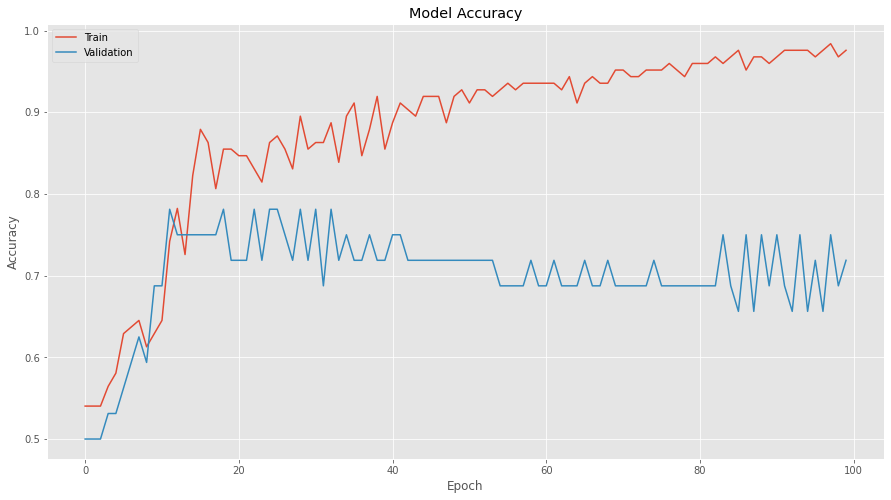

In [26]:
train_acc_better_model1,val_acc_better_model1 = plot_history(history_better_model1)

In [27]:
acc_better_model1, auc_better_model1 = model_report(better_model1, X_test, y_test)

              precision    recall  f1-score   support

           0       0.77      0.82      0.79        28
           1       0.77      0.71      0.74        24

    accuracy                           0.77        52
   macro avg       0.77      0.76      0.77        52
weighted avg       0.77      0.77      0.77        52

Test data roc_auc_score = 0.765


## Results

In [28]:
print(f"This improved model achieved a training accuracy of over {round(train_acc_better_model1*100,2)}%, but a validation accuracy of only about {round(val_acc_better_model1*100,2)}%.\nIn the graphic above we can see clear signs of overfitting: \nThe Train Accuracy increases, but the validation Accuracy decreases.\nThe accuracy on test data is {round(acc_better_model1*100,2)}% \nAnd ROC AUC Score is {round(auc_better_model1*100,2)}% \nAlso there is enough large difference in the Accuracy of train and test data to state that baseline model learning the training data really well but fails to generalize the knowledge to the test data. ")

This improved model achieved a training accuracy of over 97.58%, but a validation accuracy of only about 71.88%.
In the graphic above we can see clear signs of overfitting: 
The Train Accuracy increases, but the validation Accuracy decreases.
The accuracy on test data is 76.92% 
And ROC AUC Score is 76.49% 
Also there is enough large difference in the Accuracy of train and test data to state that baseline model learning the training data really well but fails to generalize the knowledge to the test data. 


# Regularizing model and tuning hyperparameters to improve performance and avoid overfitting

### Defining the Regularized model architecture
This network has three hidden layers with 30 and 15 nodes respectively and relu is a popular choice for activation function, which is short for rectified linear unit.
After each hidden layer, we add a dropout layer, which has been shown to reduce the chances of overfitting in some cases. For these dropout layers, we need to specify the dropout rate. 

- vetor with 60 values for the input layer.
- Used a fully-connected linear layer with 30 hidden-neurons.
- Used a fully-connected linear layer with 15 hidden-neurons.
- Used the ReLU activation function for hidden layers.
- Used a fully-connected linear layer to the 1 outputs with sigmoid activation function.
- Used a dropout layer with 0.35 dropout rate after each hidden layer.
- Optimization algorithm used - ADAM
- Metrics Used - Accuracy
- Loss Function - binary_crossentropy

In [29]:
# regularized

def regularized_model():
    #regularized model
    model = keras.Sequential([
        keras.layers.Dense(30, input_dim=60, activation='relu'),
        keras.layers.Dropout(0.35),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dropout(0.35),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy',
                  optimizer='adam', 
                  metrics=['accuracy'])
    return model

In [30]:
regularized_model1 = regularized_model()

# in the summary, notice the LARGE number of total parameters in the model than baseline model 
regularized_model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 30)                1830      
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 15)                465       
_________________________________________________________________
dropout_1 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 16        
Total params: 2,311
Trainable params: 2,311
Non-trainable params: 0
_________________________________________________________________


In [31]:
epochs = 100
batch_size = 16

history_regularized_model1 = regularized_model1.fit(X_train, 
                              y_train,
                              epochs=epochs,
                              batch_size=batch_size,
                              verbose=0, # set to 1 for iteration details, 0 for no details
                              shuffle=True,
                              validation_split= 0.2)

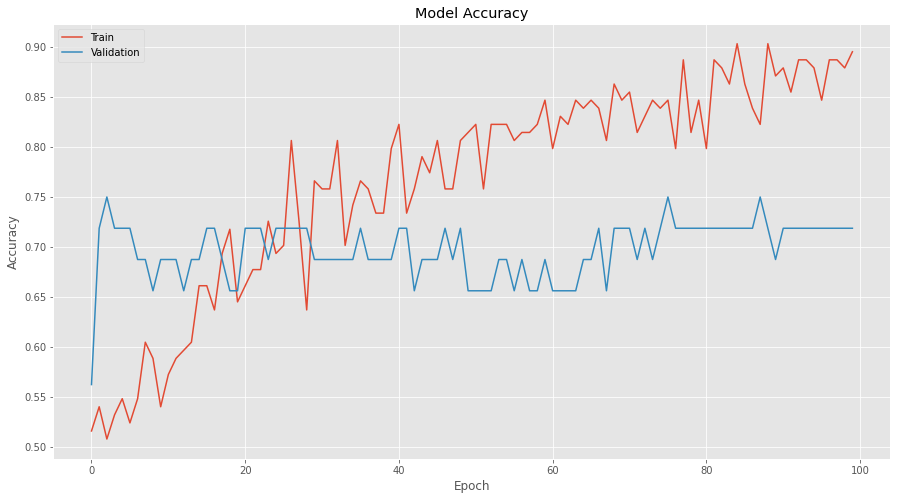

In [32]:
train_acc_regularized_model1,val_acc_regularized_model1 = plot_history(history_regularized_model1)

In [33]:
acc_regularized_model1, auc_regularized_model1 = model_report(regularized_model1, X_test, y_test)

              precision    recall  f1-score   support

           0       0.84      0.75      0.79        28
           1       0.74      0.83      0.78        24

    accuracy                           0.79        52
   macro avg       0.79      0.79      0.79        52
weighted avg       0.79      0.79      0.79        52

Test data roc_auc_score = 0.792


## Results

In [34]:
print(f"This regularized model achieved a training accuracy of over {round(train_acc_regularized_model1*100,2)}%, but a validation accuracy of only about {round(val_acc_regularized_model1*100,2)}%.\nIn the graphic above, it can be clearly observed that: \nAs the Training Accuracy increases, the validation Accuracy is also increasing.\nThe accuracy on test data is {round(acc_regularized_model1*100,2)}% \nAnd ROC AUC Score is {round(auc_regularized_model1*100,2)}%.\nThis model is not overfitting the data. ")

This regularized model achieved a training accuracy of over 89.52%, but a validation accuracy of only about 71.88%.
In the graphic above, it can be clearly observed that: 
As the Training Accuracy increases, the validation Accuracy is also increasing.
The accuracy on test data is 78.85% 
And ROC AUC Score is 79.17%.
This model is not overfitting the data. 


# Evaluation

In [35]:
# this classifier will be use to the 5 different training fold 

def KfoldEvaluation(model_fn, cv =5):
    classifier = KerasClassifier(build_fn = model_fn,
                                 batch_size = 16,
                                 nb_epoch = 100,
                                 verbose = 0)

    results = cross_val_score(estimator=classifier,
                                 X = X,
                                 y = y,
                                 cv=cv)

    print(f"{model_fn.__name__}: Mean Accuracy : {round(results.mean()*100,2)}% ")

In [36]:
models_fns = [baseline_model, better_model, regularized_model]

In [38]:
for model in models_fns:
    KfoldEvaluation(model)

baseline_model: Mean Accuracy : 25.92% 
better_model: Mean Accuracy : 23.33% 
regularized_model: Mean Accuracy : 33.1% 


# Conclusion
- The Baseline model is performing well on training data but not on testing data. Also the accuracy was not satisfactory. Hence to improve the model we added dense layer.
- The Next model, there was a good improvement in training accuracy but with increase in training accuracy, decrease in validation accuracy is observed which is a clear sign of overfitting.
- To avoid overfitting, drop out layers were added after each hidden layer. The regularized model is still not perfect, but  the model is overfitting way less.
- Further Accuracy of the model can be increases by:
    1. Feature Engineering
    2. Adding more dense layers 
    3. Tuning Hyper parameters such as:
        - Optimizer
        - Learning rate
        - No of nodes in each layer
        - Drop out rate
        - Epochs
    4. Adding more data